In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import requests
import io
import warnings
warnings.filterwarnings('ignore')

Data Mining & Exploration

In [22]:
# Loading the CSV with pandas
data = pd.read_csv('Telecom_customer_churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc

In [23]:
data.shape  # this shows 21 columns and 7043 rows in dataset

(7043, 21)

In [24]:
data.info()  # column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
data.dtypes # types of data in dataset

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
#Removing customer IDs from the data set the columns not used in the predictive model.
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.¶Also, converting Total Charges to a numerical data type.

In [27]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [28]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

In [29]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

Correlations between customer data features and customer churn

Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.

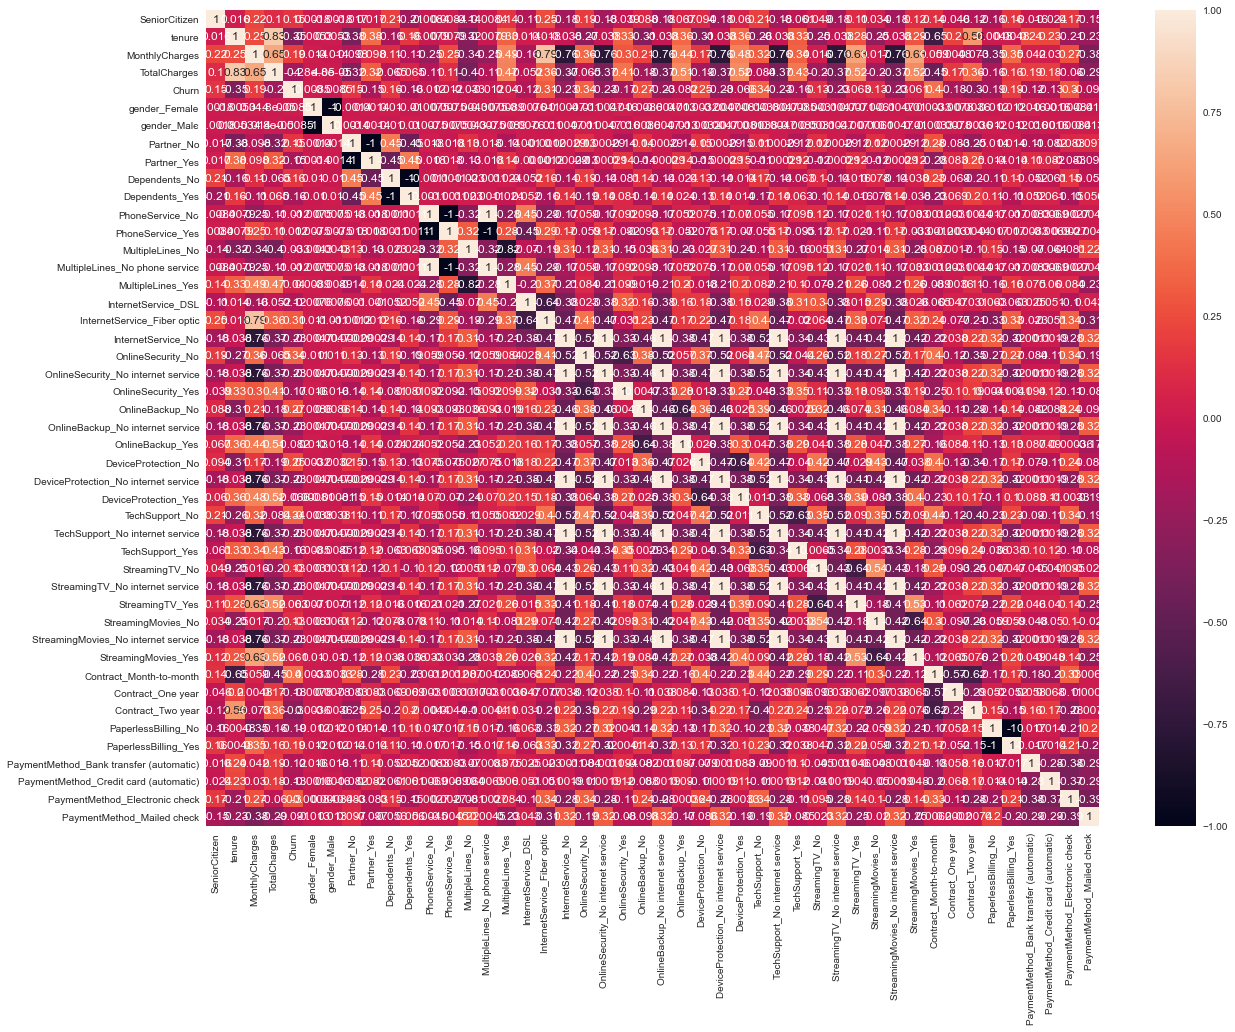

In [30]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

To avoid unstable estimates of coeffiecients in the model, need to drop the ‘TotalCharges’ variable during regression process, as it is highly correlated to both ‘Tenure’ and ‘MonthlyCharges’.

<AxesSubplot:>

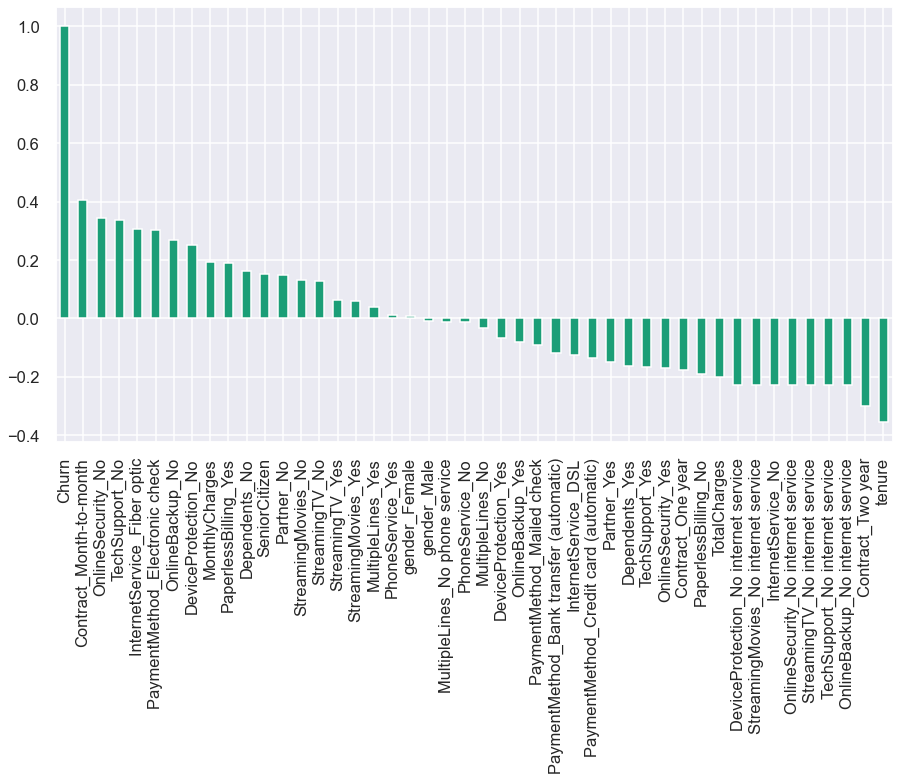

In [31]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No...etc. are negatively correlated with Churn.

Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport..., etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.

In [32]:
df_dummies.corr()  # reporting correlation matrix

SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.015683   
tenure                                        0.015683  1.000000   
MonthlyCharges                                0.219874  0.246862   
TotalCharges                                  0.102411  0.825880   
Churn                                         0.150541 -0.354049   
gender_Female                                 0.001819 -0.005285   
gender_Male                                  -0.001819  0.005285   
Partner_No                                   -0.016957 -0.381912   
Partner_Yes                                   0.016957  0.381912   
Dependents_No                                 0.210550 -0.163386   
Dependents_Yes                               -0.210550  0.163386   
PhoneService_No                              -0.008392 -0.007877   
PhoneService_Yes                              0.008392  0.007877   
MultipleLines_No                             -0.136377 -0.323891   
MultipleLines_No phone service               -0.008392 -0.007877   
MultipleLines_Yes                             0.142996  0.332399   
InternetService_DSL                          -0.108276  0.013786   
InternetService_Fiber optic                   0.254923  0.017930   
InternetService_No                           -0.182519 -0.037529   
OnlineSecurity_No                             0.185145 -0.265987   
OnlineSecurity_No internet service           -0.182519 -0.037529   
OnlineSecurity_Yes                           -0.038576  0.328297   
OnlineBackup_No                               0.087539 -0.314769   
OnlineBackup_No internet service             -0.182519 -0.037529   
OnlineBackup_Yes                              0.066663  0.361138   
DeviceProtection_No                           0.094403 -0.314820   
DeviceProtection_No internet service         -0.182519 -0.037529   
DeviceProtection_Yes                          0.059514  0.361520   
TechSupport_No                                0.205254 -0.264363   
TechSupport_No internet service              -0.182519 -0.037529   
TechSupport_Yes                              -0.060577  0.325288   
StreamingTV_No                                0.048664 -0.246814   
StreamingTV_No internet service              -0.182519 -0.037529   
StreamingTV_Yes                               0.105445  0.280264   
StreamingMovies_No                            0.034196 -0.252890   
StreamingMovies_No internet service          -0.182519 -0.037529   
StreamingMovies_Yes                           0.119842  0.285402   
Contract_Month-to-month                       0.137752 -0.649346   
Contract_One year                            -0.046491  0.202338   
Contract_Two year                            -0.116205  0.563801   
PaperlessBilling_No                          -0.156258 -0.004823   
PaperlessBilling_Yes                          0.156258  0.004823   
PaymentMethod_Bank transfer (automatic)      -0.016235  0.243822   
PaymentMethod_Credit card (automatic)        -0.024359  0.232800   
PaymentMethod_Electronic check                0.171322 -0.210197   
PaymentMethod_Mailed check                   -0.152987 -0.232181   

                                         MonthlyCharges  TotalCharges  \
SeniorCitizen                                  0.219874      0.102411   
tenure                                         0.246862      0.825880   
MonthlyCharges                                 1.000000      0.651065   
TotalCharges                                   0.651065      1.000000   
Churn                                          0.192858     -0.199484   
gender_Female                                  0.013779     -0.000048   
gender_Male                                   -0.013779      0.000048   
Partner_No                                    -0.097825     -0.319072   
Partner_Yes                                    0.097825      0.319072   
Dependents_No                                  0.112343     -0.064653   
Dependents_Yes                           

Data exploration and Visualisation

Doing more visualization to better understand the patterns in the data and potentially form some hypothesis. First looking at the distribution of individual variables and then slice and dice the data for to check if interesting trends are present.

Demographics to understand the gender, age range, patner and dependent status of the customers

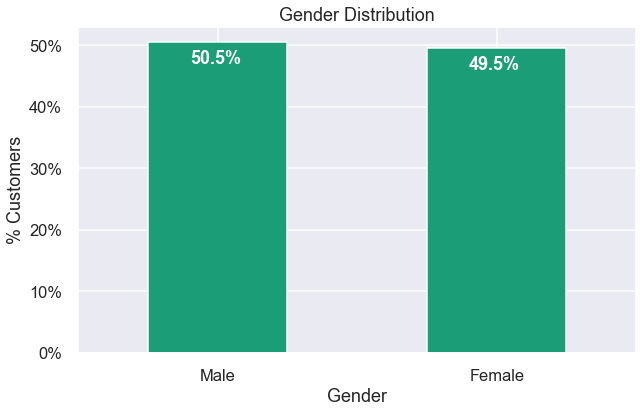

In [33]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Above plot shows almost equal number of male and female customers; 50.5% are male customers while the other 49.5% are female. Below pie chart shows 16.2% senior citizens customer. Thus most of the customers in the data are younger people.

Text(0.5, 1.0, '% of Senior Citizens')

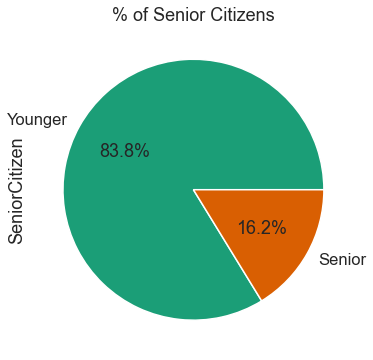

In [34]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

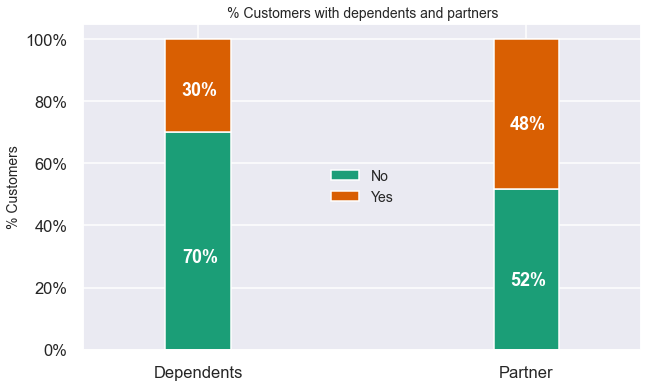

In [36]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

It would be interesting is to look at the % of customers with both partners and dependents

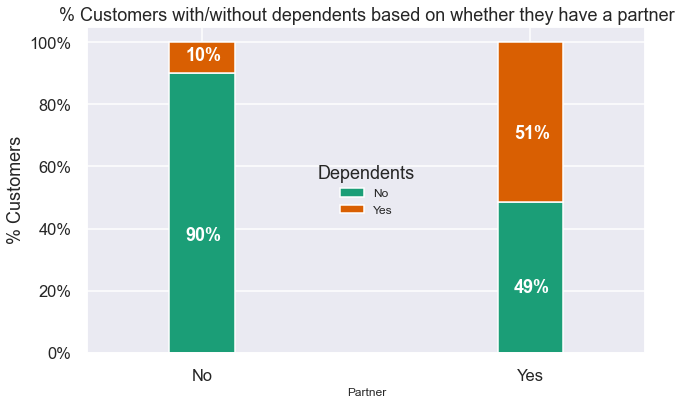

In [37]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

Customer Account Information

Text(0.5, 1.0, 'Number of Customers by tenure')

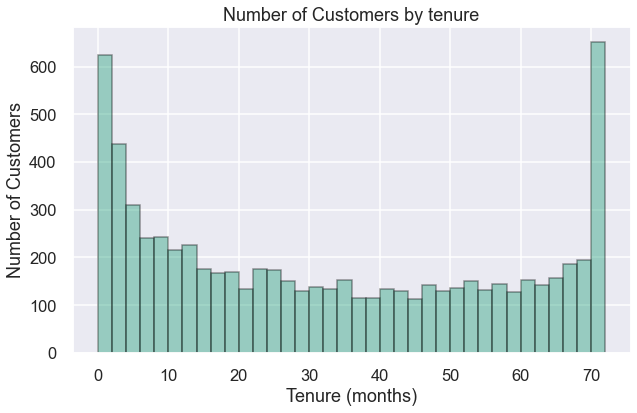

In [38]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

Checking the customers by tenure of contract

Text(0.5, 1.0, 'Number of Customers by Contract Type')

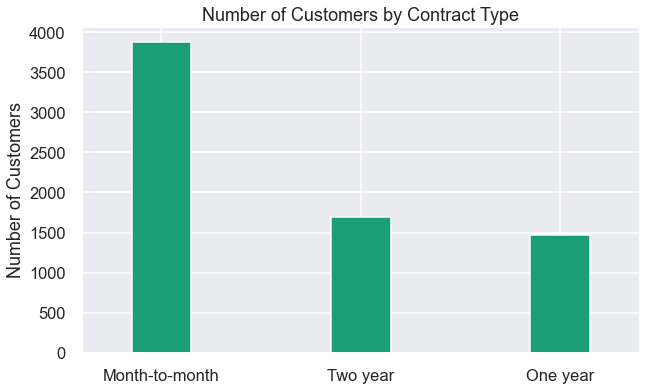

In [39]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

Text(0.5, 1.0, 'Two Year Contract')

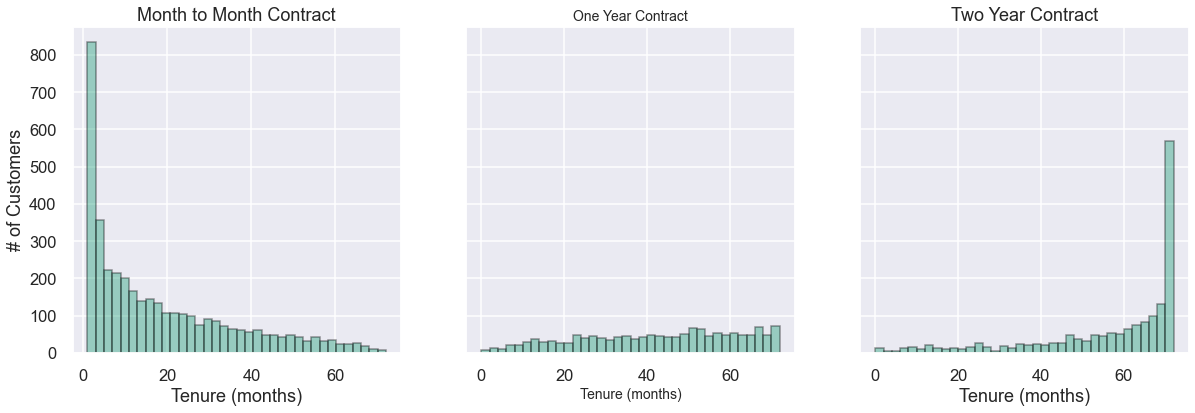

In [40]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Visualization of the distribution of various services used by customers

In [41]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

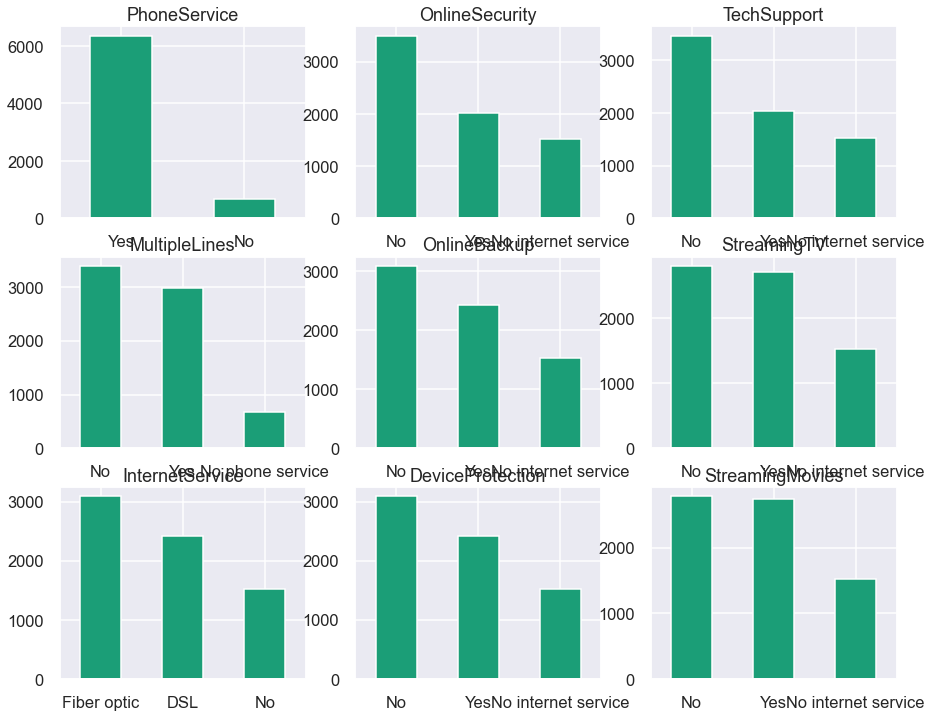

In [42]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Above plot displays a clear visbility of the different services provided by the Telecom company and availabled by the customers.

Datamining to check prediction variable and it's interaction with other variables

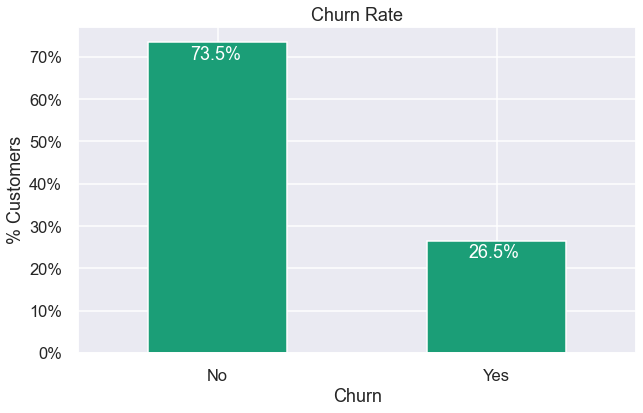

In [43]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling

Text(0, 0.5, 'Monthly Charges')

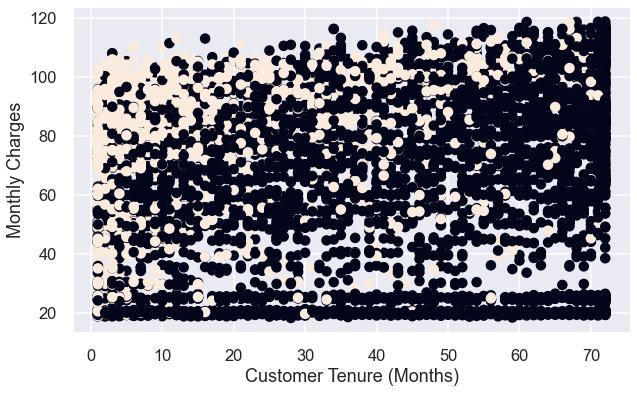

In [44]:
rcParams['figure.figsize']=10,6
sns.set(style='darkgrid', context='talk', palette='Dark2')

plt.scatter(
   df_dummies['tenure'], 
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

It’s hard to draw any conclusions from this visualization which compares the customer’s tenure with their monthly charges. So, this plot has been redrawn on boxplot for better visualization. However, from below plot, it can be clearly seen that, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

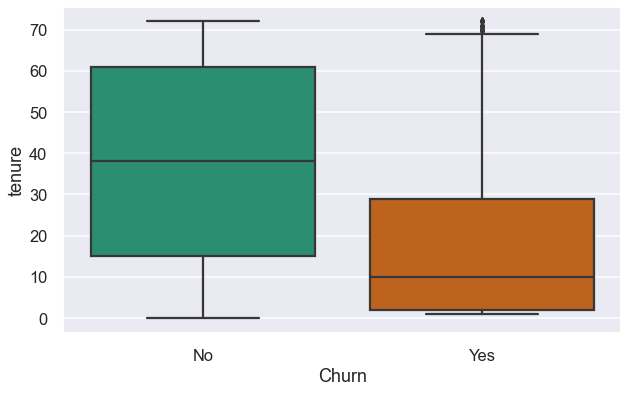

In [45]:
sns.boxplot(x = data.Churn, y = data.tenure)

This plot shows no new information. We have already witnessed that, longer (over 70 months) customers are loyal to do not churn.

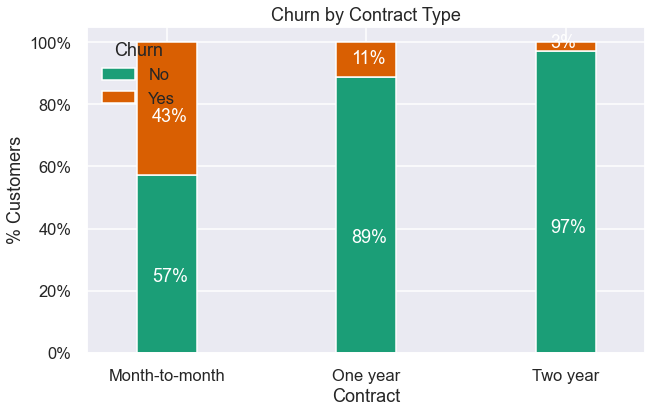

In [46]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

Above plot too is no different from the correlation plot and information we obtained so far, the customers who have a month to month contract have a very high churn rate. This gives some valuable input to sales/marketing department.

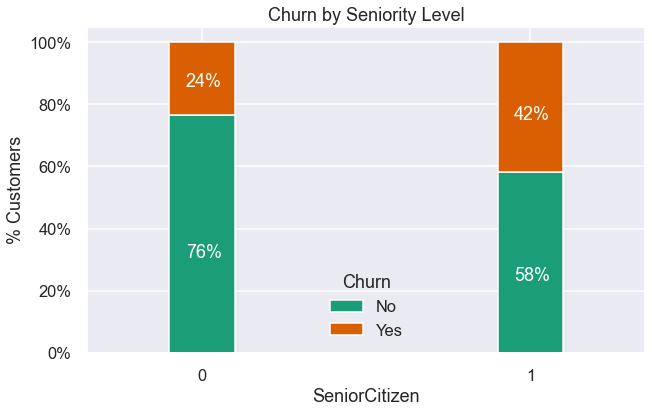

In [47]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')

From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. To explore the reason, the below plot was drawn which clearly shows higher % of customers churn when the monthly charges are high. This includes Sr Citizens too.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

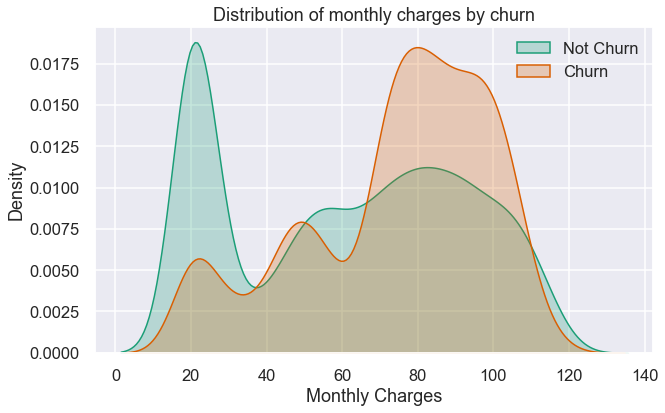

In [48]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Assumptions

For the purpose of this analysis, 2 assumptions can be made:

1) For each customer that left the company, it would cost Telco dollar 500.00 to replace that customer. Marketing, ads, campaigns, and outreach — the cost adds up.

2) Retain each customer who was likely to churn by investing dollar 100 in them. This could be through discounts, improving service (upping their internet speed, for example), or offering perks.

Above measures are part of diagnostic analytic.

Predictive modelling

We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. It is important to scale the variables in regression so that all of them are within a range of 0 to 1.

Logistic regression requires there to be little or no multicollinearity among the independent variables. Therefore, as discussed in the begining, Total Charges will be removed.

In [49]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Methodology

Our first step was to split our data into training and test sets using train-test-split, which would allow us to cross-validate our results later. We also stratified the train-test-split, to ensure that the same proportion of our target variable was found in both our training and test sets.

Spiliting the data

X is the data with the independent variables, Y is the data with the dependent variable. The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [52]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients

Intercept: [-0.98796454]
Regression: [[ 0.18715203 -2.43931051 -0.00852662  0.01488481 -0.01485236  0.01063183
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.22540661 -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485146  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


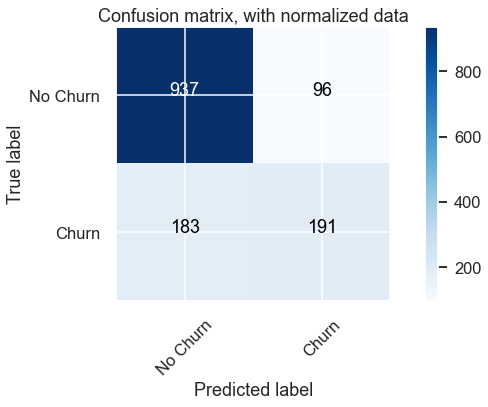

In [53]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

The classification rate of 80%, considered as good accuracy. However, it may not be the right measure at times, when the data is skewed and target class is not balanced . So, additional measures like Precision, Recall, F score (combined metric) have been considered

In [54]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [55]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

It can be observed that some variables have a positive relation to our predicted variable (Churn) and some have a negative relation

In [56]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

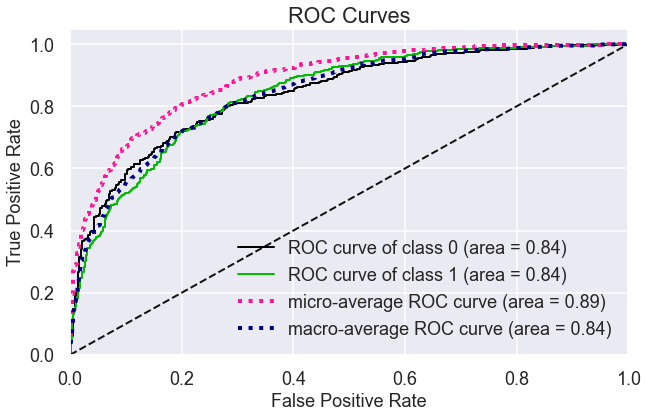

In [57]:
import scikitplot as skplt #to make things easy
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

AUC is 0.84 means there is 84% chance that model will be able to distinguish between Churn and NoChurn.

Handling imbalanced classes

In [58]:
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [59]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

Now that we have a 1:1 ratio for our classes, will train another logistic regression model

In [60]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

In [61]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


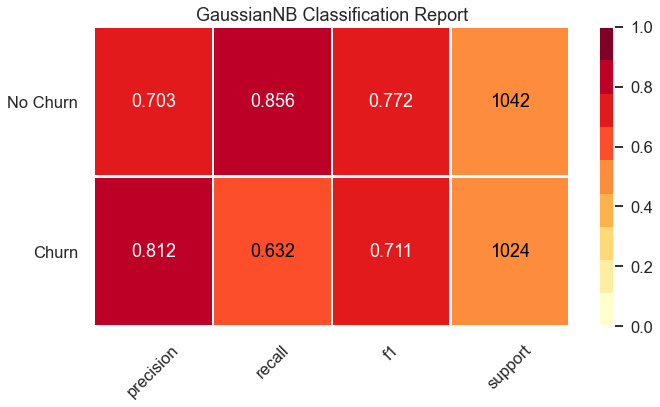

In [63]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

classes=['Churn','No Churn']

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(train_x_upsampled, train_y_upsampled)  # Fit the visualizer and the model
visualizer.score(test_x_upsampled, test_y_upsampled)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

From above output it can be see that, the overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved

In [64]:
from sklearn.metrics import roc_auc_score
 

# Get class probabilities for both models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)


# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8408094382697195
Balanced model AUROC: 0.7530398085112764


AUROC scores are >7.0 in both the models. Unbalanced model is >8.0. This suggests that both models have the ability to distiguish between observations from each class.


K-fold cross validation

In [65]:
from sklearn.model_selection import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


Model has provided 80% accuracy so far after all necessary validation and cross validation.

For each customer, two important data points for survival analysis are required

‘Tenure’: how long they have been a customer when the data is observed ‘Churn’: whether or not the customer left when the data was observed

In [69]:
# transform tenure and churn features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   
3  7795-CFOCW    Male              0      No         No    45.0           No   
4  9237-HQITU  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85  False  
1               Mailed check          56.95        1889.5  False  
2               Mailed check          53.85        108.15  False  
3  Bank transfer (automatic)          42.30       1840.75  False  
4           Electronic check          70.70        151.65  False  

[5 rows x 21 columns]

Kaplan-Meier

In [73]:
pip install lifelines

  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=9580697c1dfa781879d30a614fd7721f7544887b46ae4607ff2906af4255768b
  Stored in directory: c:\users\win10\appdata\local\pip\cache\wheels\85\f5\d2\3ef47d3a836b17620bf41647222825b065245862d12aa62885
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4034 sha256=6774913d0b1496ab3fdd6ec38c652ada315c0744f978d1f6da88ab2f1ecf0cae
  Stored in directory: c:\users\win10\appdata\local\pip\cache\wheels\16\a2\b6\582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [74]:
import lifelines
from lifelines import KaplanMeierFitter

# fitting kmf to churn data
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 7043 right-censored observations>

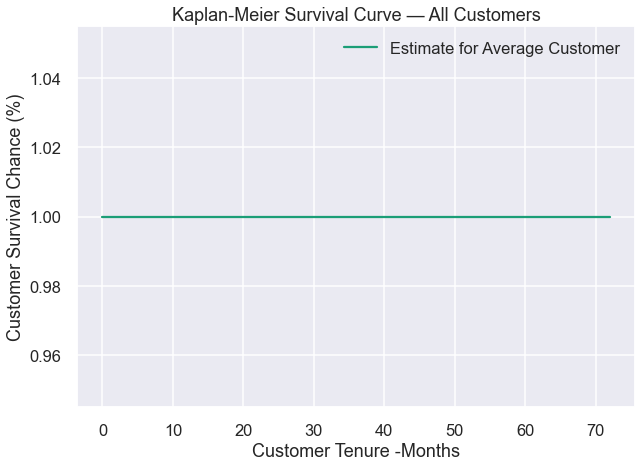

In [75]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [76]:
a = pd.read_csv('Telecom_customer_churn.csv')
a.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [77]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [78]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [79]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   Partner_No                               7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  MultipleLines_No                         7043 no

In [80]:
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

SeniorCitizen  tenure  gender_Female  Partner_Yes  Dependents_Yes  \
0              0       1              1            1               0   
1              0      34              0            0               0   
2              0       2              0            0               0   
3              0      45              0            0               0   
4              0       2              1            0               0   

   PhoneService_Yes  MultipleLines_Yes  InternetService_DSL  \
0                 0                  0                    1   
1                 1                  0                    1   
2                 1                  0                    1   
3                 0                  0                    1   
4                 1                  0                    0   

   InternetService_Fiber optic  OnlineSecurity_Yes  ...  StreamingMovies_Yes  \
0                            0                   0  ...                    0   
1                            0                   1  ...                    0   
2                            0                   1  ...                    0   
3                            0                   1  ...                    0   
4                            1                   0  ...                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   MonthlyCharges  TotalCharges  Churn_Yes  
0           29.85         29.85          0  
1           56.95       1889.50          0  
2           53.85        108.15          1  
3           42.30       1840.75          0  
4           70.70        151.65          1  

[5 rows x 24 columns]

Head of the dummied and reduced dataset; Gender_Male has disappeared, as has Partner_No, Dependents_No and so on. For any matrix-based regression , Singular Matrices always throw an error in Python . Therefore, had to throw one of the colulmns away while creating dummy variables. We will still be able to infer the missing category from the remaining variables.

In [81]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(a, test_size=0.2)

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)   ## Fit the data to train the model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4120 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1514
   partial log-likelihood = -9924.773
         time fit was run = 2021-11-10 07:50:23 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
SeniorCitizen                            0.015      1.015      0.055           -0.093            0.123                0.911                1.131
gender_Female                            0.070      1.072      0.047           -0.022            0.161                0.979                1.175
Partner_Yes                             -0.213      0.808      0.053           -0.318           -0.108                0.728                0.897
Dependents_Yes                          -0.034      0.966      0.071           -0.174            0.105                0.840                1.111
PhoneService_Yes                         0.628      1.874      0.465           -0.283            1.540                0.753                4.663
MultipleLines_Yes                        0.015      1.015      0.120           -0.221            0.250                0.802                1.284
InternetService_DSL                      2.097      8.145      0.616            0.890            3.304                2.436               27.231
InternetService_Fiber optic              2.967     19.430      1.138            0.736            5.198                2.087              180.877
OnlineSecurity_Yes                      -0.252      0.777      0.127           -0.502           -0.002                0.606                0.998
OnlineBackup_Yes                        -0.067      0.935      0.121           -0.304            0.170                0.738                1.186
DeviceProtection_Yes                     0.062      1.064      0.120           -0.174            0.298                0.841                1.348
TechSupport_Yes                         -0.129      0.879      0.126           -0.377            0.118                0.686                1.126
StreamingTV_Yes                          0.234      1.264      0.227           -0.211            0.680                0.810                1.973
StreamingMovies_Yes                      0.185      1.203      0.224           -0.254            0.623                0.776                1.864
Contract_One year                       -1.300      0.273      0.132           -1.558           -1.042                0.211                0.353
Contract_Two year                       -3.619      0.027      0.297           -4.202           -3.036                0.015                0.048
PaperlessBilling_Yes                     0.146      1.157      0.061            0.027            0.265                1.027                1.304
PaymentMethod_Bank transfer (automatic) -0.487      0.615      0.090           -0.663           -0.310                0.515                0.733
PaymentMethod_Credit card (automatic)   -0.578      0.561      0.095           -0.764           -0.393                0.466                0.675
PaymentMethod_Electronic check          -0.170      0.844      0.074           -0.314           -0.025                0.730                0.975
MonthlyCharges                           0.021      1.021      0.022           -0.022            0.064                0.978                1.066
TotalCharges                            -0.002      0.998      0.000           -0.002           -0.001                0.998                0.999

                                              z       

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

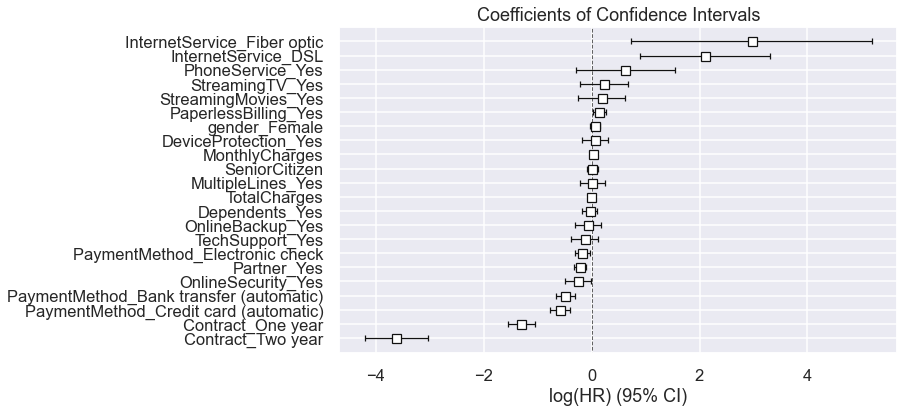

In [93]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

# So here we are looking at the different survival curves for customers whose TotalCharges are near zero compared to those 
# whose TotalCharges are closer to 4000.

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4120 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Contract_One year                       km             50.17 <0.005     39.37
                                        rank           46.19 <0.005     36.44
Contract_Two year                       km             52.95 <0.005     41.41
                                        rank           44.52 <0.005     35.21
Dependents_Yes                          km              1.56   0.21      2.24
                                        rank            1.21   0.27      1.88
DeviceProtection_Yes                    km              1.38   0.24      2.06
                                        rank            3.75   0.05      4.24
InternetService_DSL                     km              8.53 <0.005      8.16
                                        rank           13.30 <0.005     11.88
InternetService_Fiber optic             km              5.24   0.02      5.50
                                        rank            8.98 <0.005      8.52
MonthlyCharges                          km              0.07   0.79      0.34
                                        rank            0.52   0.47      1.08
MultipleLines_Yes                       km              1.07   0.30      1.73
                                        rank            4.37   0.04      4.77
OnlineBackup_Yes                        km              3.27   0.07      3.82
                                        rank            5.85   0.02      6.01
OnlineSecurity_Yes                      km              1.44   0.23      2.12
                                        rank            4.03   0.04      4.48
PaperlessBilling_Yes                    km              0.46   0.50      1.01
                                        rank            0.83   0.36      1.47
Partner_Yes                             km              3.00   0.08      3.59
                                        rank            3.77   0.05      4.26
PaymentMethod_Bank transfer (automatic) km              0.51   0.47      1.08
                                        rank            3.42   0.06      3.95
PaymentMethod_Credit card (automatic)   km              1.63   0.20      2.31
                                        rank            5.04   0.02      5.33
PaymentMethod_Electronic check          km              0.63   0.43      1.23
                                        rank            2.94   0.09      3.53
PhoneService_Yes                        km              3.47   0.06      4.00
                                        rank            6.64   0.01      6.64
SeniorCitizen                           km              7.75   0.01      7.54
                                        rank            4.98   0.03      5.29
StreamingMovies_Yes                     km              3.29   0.07      3.84
                                        rank            5.94   0.01      6.08
StreamingTV_Yes                         km              3.63   0.06      4.14
                                        rank            6.21   0.01      6.30
TechSupport_Yes                         km              4.31   0.04      4.72
                                        rank            7.71   0.01      7.51
TotalCharges                            km             93.28 <0.005     70.90
                                        rank           18.05 <0.005     15.50
gender_Female                           km              0.00   0.98      0.02
                                        rank            0.06   0.81      0.30



1. Variable 'SeniorCitizen' failed the non-proportional test: p-value is 0.0054.

   Advice: with so few unique values (only 2), you can include `strata=['SeniorCitizen', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Partner_Yes' failed the non-proportional test: p-value is 0.0523.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'PhoneService_Yes' failed the non-proportional test: p-value is 0.0100.

   Advice: with so few unique values (only 2), you can include `strata=['PhoneService_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'MultipleLines_Yes' failed the non-proportional test: p-value is 0.0366.

   Advice: with so few unique valu

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0256)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0054)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0523)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0831)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0100)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0626)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0366)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.3018)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0003)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0035)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0027)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0221)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0447)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.2299)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0156)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0708)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p

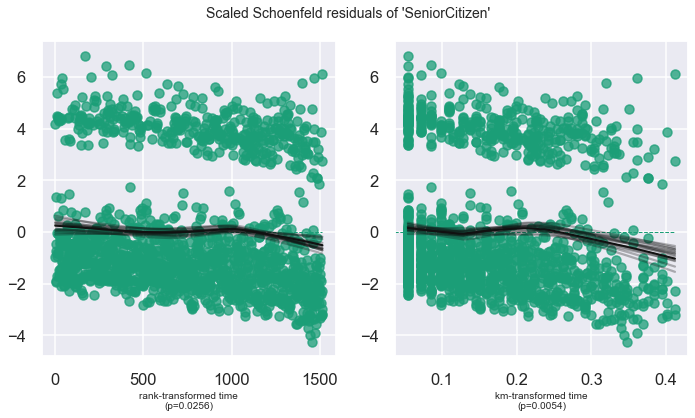

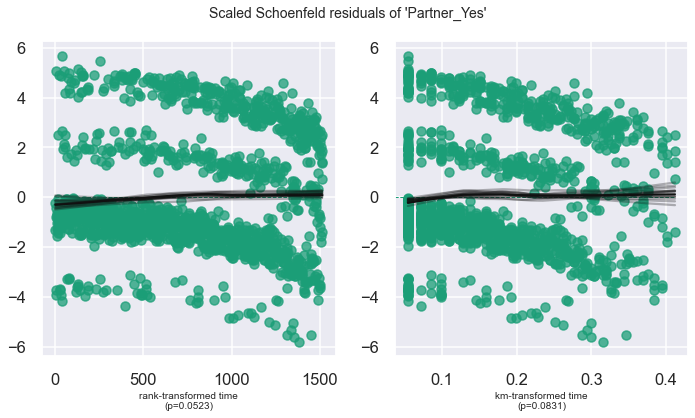

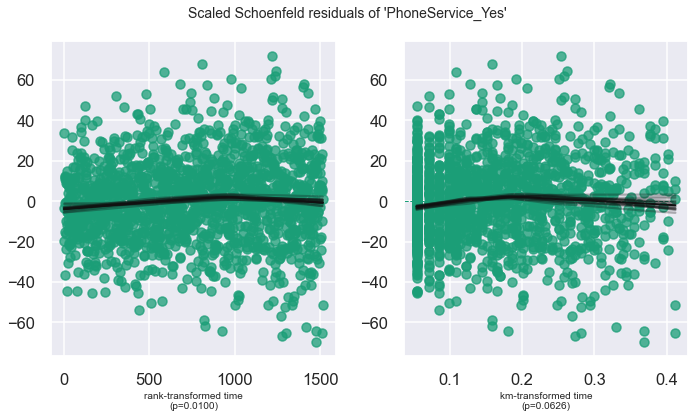

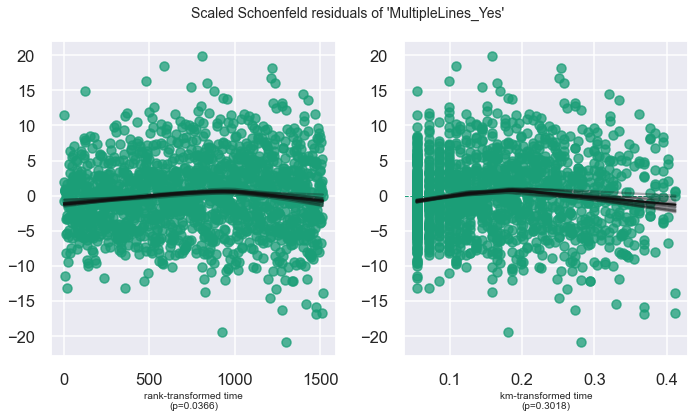

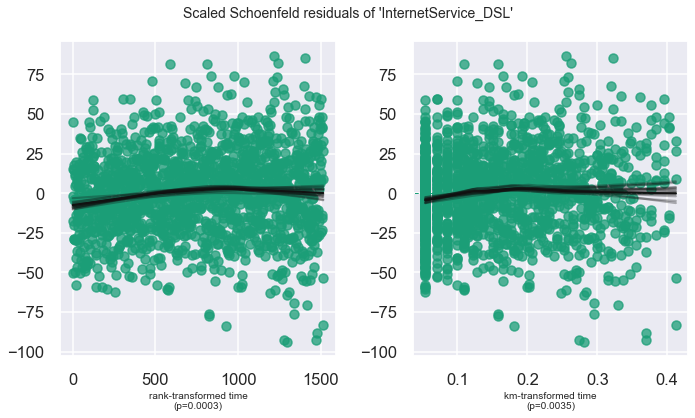

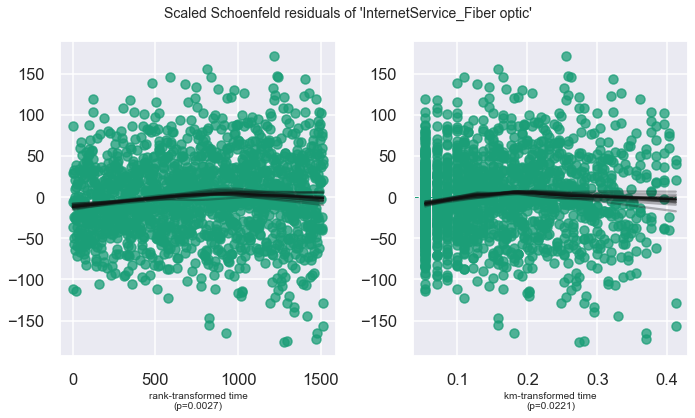

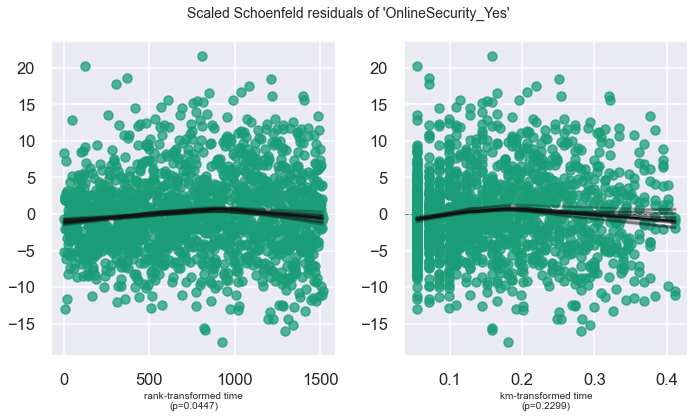

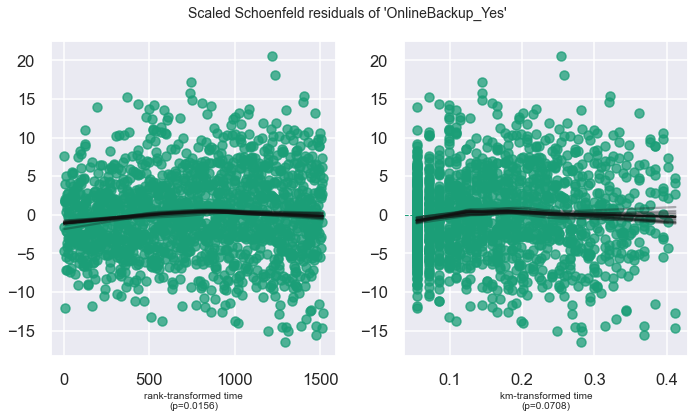

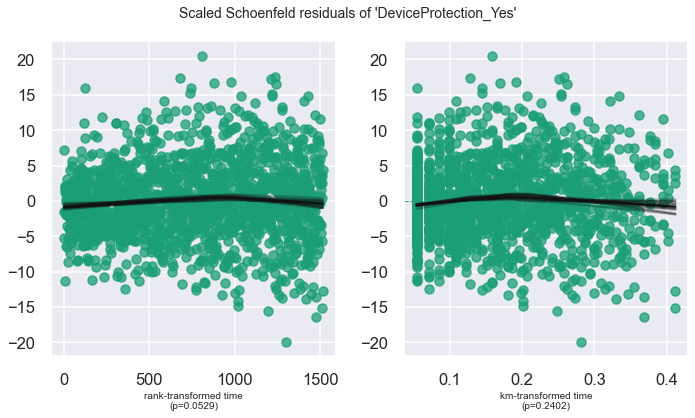

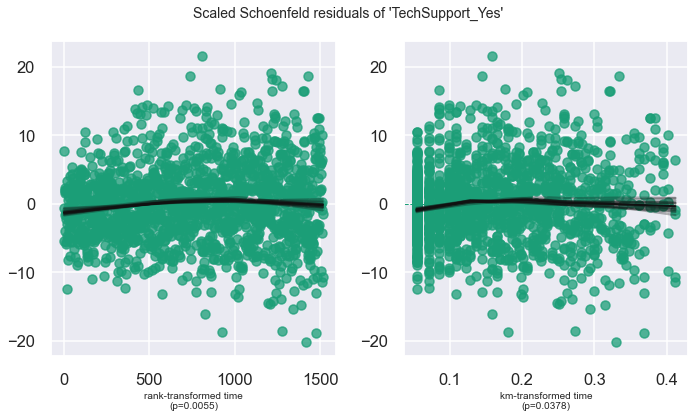

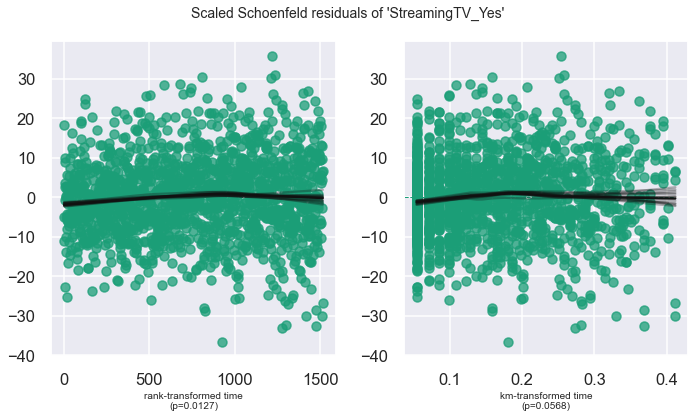

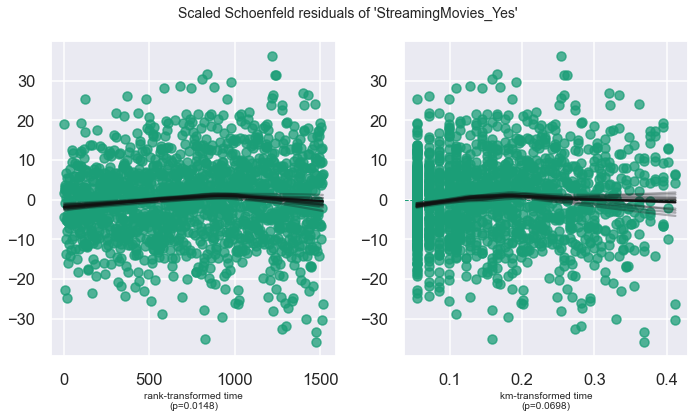

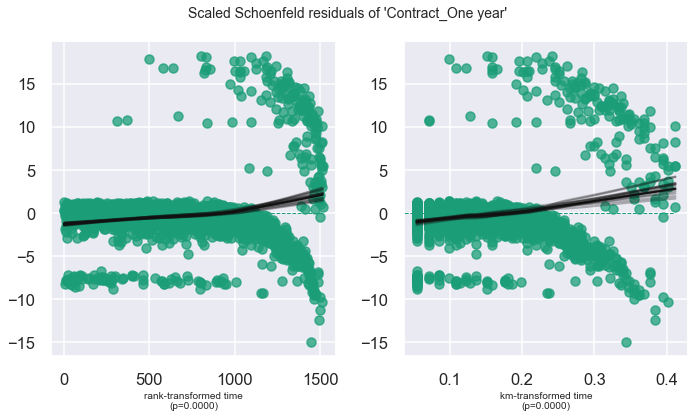

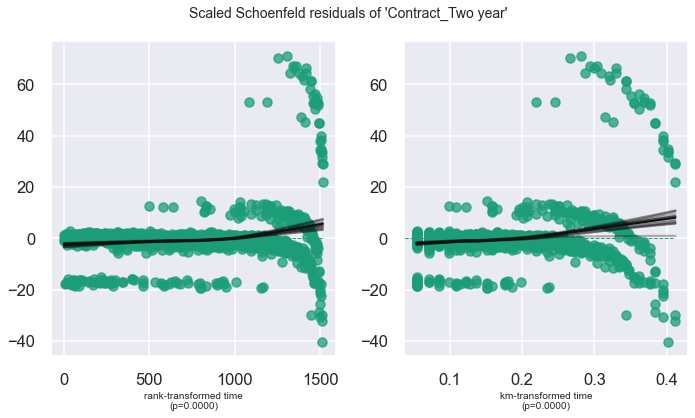

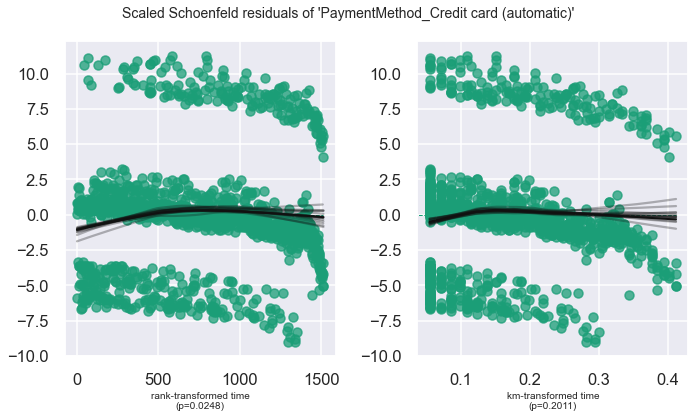

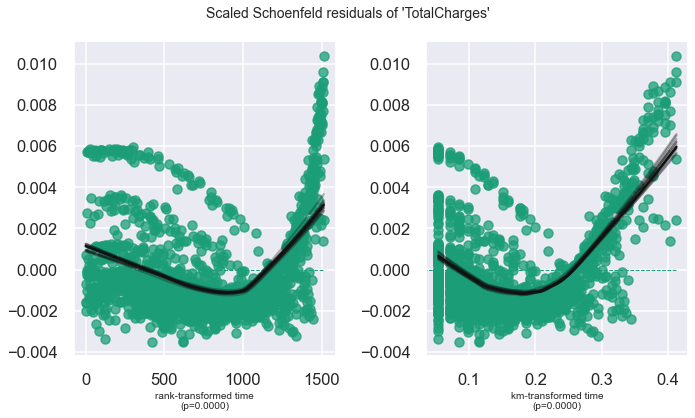

In [94]:
cph.check_assumptions(cph_train, p_value_threshold=0.05, show_plots=True)

In [96]:
from lifelines.datasets import load_regression_dataset

df = load_regression_dataset()

censored_subjects = a.loc[a['Churn_Yes'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[a.loc[c.name, 'tenure']])) 

Text(0.5, 1.0, 'Survival Curve')

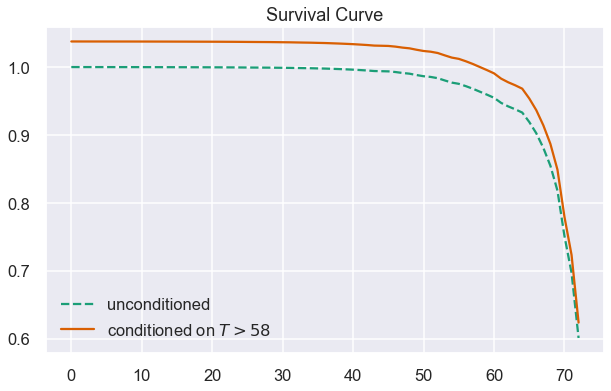

In [97]:
subject = 12
unconditioned_sf[subject].plot(ls="--", label="unconditioned")
conditioned_sf[subject].plot(label="conditioned on $T>58$")
plt.legend()
plt.title('Survival Curve')

In [98]:
from lifelines.utils import median_survival_times, qth_survival_times

predictions_50 = median_survival_times(conditioned_sf)
# This is the same, but you can change the fraction to get other %tiles. 
# predictions_50 = qth_survival_times(.50, conditioned_sf)

In [99]:
# Using this single row and by joining it to our data DataFrame can investigate 
# the predicted remaining value a customer has for the business:

values = predictions_50.T.join(a[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

values.head()

0.5  MonthlyCharges  tenure  RemainingValue
0  22.0           29.85       1          626.85
1  49.0           56.95      34          854.25
3  60.0           42.30      45          634.50
6  30.0           89.10      22          712.80
7  27.0           29.75      10          505.75

In [100]:
upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)',
            'Contract_One year',
            'Contract_Two year']

results_dict = {}
for customer in values.index:
    actual = a.loc[[customer]]
    change = a.loc[[customer]]
    results_dict[customer] = [cph.predict_median(actual)]
    for upgrade in upgrades: 
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
        results_dict[customer].append(cph.predict_median(change))
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

results_df = pd.DataFrame(results_dict).T
results_df.columns = ['baseline'] + upgrades
actions = values.join(results_df).drop([0.5], axis=1)

In [102]:
actions.head()

MonthlyCharges  tenure  RemainingValue  baseline  \
0           29.85       1          626.85      22.0   
1           56.95      34          854.25      47.0   
3           42.30      45          634.50      59.0   
6           89.10      22          712.80      25.0   
7           29.75      10          505.75      25.0   

   PaymentMethod_Credit card (automatic)  \
0                                   27.0   
1                                   52.0   
3                                   64.0   
6                                   20.0   
7                                   31.0   

   PaymentMethod_Bank transfer (automatic)  Contract_One year  \
0                                     26.0               33.0   
1                                     51.0               37.0   
3                                     55.0               49.0   
6                                     30.0               37.0   
7                                     30.0               37.0   

   Contract_Two year  
0               52.0  
1               71.0  
3                inf  
6               54.0  
7               55.0

It can be seen from this that if telecom company can manage to get the first customer to use a Credit Card payments that could increase the survival time by 3 months (26– 23 baseline) and so on. This input helps to take necessary strategy to retain customers.

To understand the financial impact-

In [103]:
actions['CreditCard Diff'] = (
    actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['BankTransfer Diff'] = (
    actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['1yrContract Diff'] = (
    actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']

actions['2yrContract Diff'] = (
    actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

actions.head()

MonthlyCharges  tenure  RemainingValue  baseline  \
0           29.85       1          626.85      22.0   
1           56.95      34          854.25      47.0   
3           42.30      45          634.50      59.0   
6           89.10      22          712.80      25.0   
7           29.75      10          505.75      25.0   

   PaymentMethod_Credit card (automatic)  \
0                                   27.0   
1                                   52.0   
3                                   64.0   
6                                   20.0   
7                                   31.0   

   PaymentMethod_Bank transfer (automatic)  Contract_One year  \
0                                     26.0               33.0   
1                                     51.0               37.0   
3                                     55.0               49.0   
6                                     30.0               37.0   
7                                     30.0               37.0   

   Contract_Two year  CreditCard Diff  BankTransfer Diff  1yrContract Diff  \
0               52.0           149.25             119.40            328.35   
1               71.0           284.75             227.80           -569.50   
3                inf           211.50            -169.20           -423.00   
6               54.0          -445.50             445.50           1069.20   
7               55.0           178.50             148.75            357.00   

   2yrContract Diff  
0             895.5  
1            1366.8  
3               inf  
6            2583.9  
7             892.5

Here, the moving the customer in the first row to paying by Credit Card could be worth up to dollar 119.40. That’ is a valuable information for business to check.

Accuracy and Calibration
Though model displayed 92.9% concordance, but considering probabilistic view of events like Churn it is necessary to check for calibration than accuracy.

Text(0.5, 1.0, 'Calibration plot for Churn prediction')

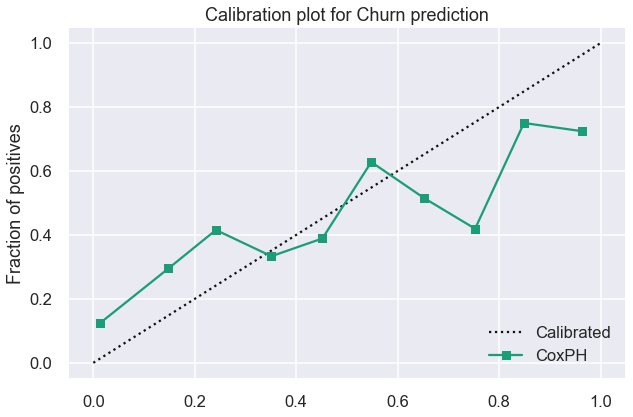

In [105]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Calibrated")

probs = 1 - np.array(cph.predict_survival_function(cph_test).loc[13])
actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = \
calibration_curve(actual, probs, n_bins=10, normalize=False)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
        label="%s" % ("CoxPH",))


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot for Churn prediction')

In [106]:
from sklearn.metrics import brier_score_loss
brier_score_loss(
    cph_test['Churn_Yes'], 1 - np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1)

0.1624660239430824

Indexing at tenure is set at 13 because the model works over a range of time periods, so, have to inspect the calibration at each step in order to get a feel for accuracy

In [ ]:
loss_dict = {}
for i in range(1,73):
    score = brier_score_loss(
        cph_test['Churn_Yes'], 1 - np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1)
    loss_dict[i] = [score]

loss_df = pd.DataFrame(loss_dict).T

fig, ax = plt.subplots()
ax.plot(loss_df.index,loss_df)

ax.set(xlabel='Prediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time')
ax.grid()
plt.show()

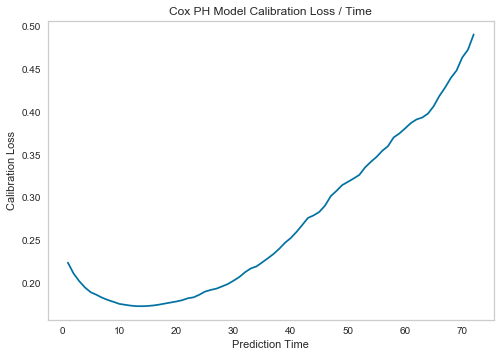

The model is well calibrated between 5 and 25 months

In [126]:
loss_df.columns = ['loss']
temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff'])
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff'])

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [127]:
temp_df.head()

MonthlyCharges  tenure  RemainingValue  baseline  \
index                                                     
936             80.85       0          2910.6      36.0   
6670            73.35       0          2787.3      38.0   
5602            80.25       6          2728.5      40.0   
6818            71.10       3          2772.9      42.0   
6754            61.90       0          2847.4      46.0   

       PaymentMethod_Credit card (automatic)  \
index                                          
936                                     41.0   
6670                                    42.0   
5602                                    46.0   
6818                                    47.0   
6754                                    50.0   

       PaymentMethod_Bank transfer (automatic)  Contract_One year  \
index                                                               
936                                       40.0               47.0   
6670                                      41.0               49.0   
5602                                      45.0               51.0   
6818                                      47.0               53.0   
6754                                      42.0               56.0   

       CreditCard Diff  BankTransfer Diff  1yrContract Diff  2yrContract Diff  \
index                                                                           
936             404.25             323.40            889.35           -2425.5   
6670            293.40             220.05            806.85           -2200.5   
5602            481.50             401.25            882.75           -2407.5   
6818            355.50             355.50            782.10           -2204.1   
6754            247.60            -247.60            619.00           -1918.9   

       CreditCard Lower  CreditCard Upper  BankTransfer Lower  \
index                                                           
936          296.332865        512.167135          281.483775   
6670         212.914636        373.885364          190.678119   
5602         339.353287        623.646713          343.637727   
6818         247.050172        463.949828          301.275086   
6754         165.991894        329.208106         -213.639236   

       BankTransfer Upper  1yrContract Lower  1yrContract Upper      loss  
index                                                                      
936            365.316225         753.696196        1025.003804  0.169958  
6670           249.421881         677.009448         936.690552  0.165593  
5602           458.862273         735.507775        1029.992225  0.162643  
6818           409.724914         645.033998         919.166002  0.162148  
6754          -281.560764         504.434273         733.565727  0.164156

For each time period telecom company wants to predict that a specific upgrade will produce and create a lower and upper bound around the estimated return on investment.